<a href="https://colab.research.google.com/github/emy217joseph/market-segmentation-on-EVs/blob/main/Car.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import numpy as np # linear algebra
import pandas as pd

In [34]:
#Importing Libraries
import re
import seaborn as sb
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
from google.colab import files
uploaded = files.upload()

Saving Car details v3.csv to Car details v3 (1).csv


In [35]:
file_path = 'Car details v3.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
print(df.head())

                           name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250N

In [5]:
df.shape #Checking shape of data
#Number of rows and columns

(8128, 13)

In [49]:
df.describe() #Checking statistics of data

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [12]:
#Checking Data types
df.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [15]:
#Checing for nulls
df.columns
for i in df.columns:
    if df[i].isnull().sum() > 0:
        print(i,df[i].isnull().sum())

mileage 221
engine 221
max_power 215
torque 222
seats 221


In [17]:
print( 'The number of duplicated row for this dataframe is: ', df.duplicated().sum())

The number of duplicated row for this dataframe is:  1202


In [18]:
df[df.duplicated()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
291,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
296,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
370,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
371,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
372,Jaguar XF 2.0 Diesel Portfolio,2017,3200000,45000,Diesel,Dealer,Automatic,First Owner,19.33 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7987,Renault Captur 1.5 Diesel RXT,2018,1265000,12000,Diesel,Individual,Manual,First Owner,20.37 kmpl,1461 CC,108.45 bhp,240Nm@ 1750rpm,5.0
7988,Maruti Ciaz Alpha Diesel,2019,1025000,32000,Diesel,Individual,Manual,First Owner,28.09 kmpl,1248 CC,88.50 bhp,200Nm@ 1750rpm,5.0
8117,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [19]:
df2 = df.copy()

In [20]:
df2.drop_duplicates(inplace=True)
df2 = df2.reset_index(drop=True)
df2

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6921,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
6922,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54 kmpl,1396 CC,88.73 bhp,219.7Nm@ 1500-2750rpm,5.0
6923,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
6924,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


In [36]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
year,6926.0,2013.420300,4.078286,1983.0,2011.0,2014.0,2017.0,2020.0
selling_price,6926.0,517270.678458,519766.985985,29999.0,250000.0,400000.0,633500.0,10000000.0
km_driven,6926.0,73995.676437,58358.095175,1.0,40000.0,70000.0,100000.0,2360457.0
seats,6718.0,5.434653,0.984230,2.0,5.0,5.0,5.0,14.0


In [54]:
df2.describe()

,year,selling_price,km_driven,seats
count,6926.000000,6.926000e+03,6.926000e+03,6718.000000
mean,2013.420300,5.172707e+05,7.399568e+04,5.434653
std,4.078286,5.197670e+05,5.835810e+04,0.984230
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.500000e+05,4.000000e+04,5.000000
50%,2014.000000,4.000000e+05,7.000000e+04,5.000000
75%,2017.000000,6.335000e+05,1.000000e+05,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [23]:
print(df2.apply(lambda x: len(x.unique())), '\n')

name             2058
year               29
selling_price     677
km_driven         921
fuel                4
seller_type         3
transmission        2
owner               5
mileage           394
engine            122
max_power         323
torque            442
seats              10
dtype: int64 



In [37]:
df_categorical= df2.select_dtypes(['object'])

df_categorical

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
0,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
1,Skoda Rapid 1.5 TDI Ambition,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm
2,Honda City 2017-2020 EXi,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)"
3,Hyundai i20 Sportz Diesel,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm
4,Maruti Swift VXI BSIII,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)"
...,...,...,...,...,...,...,...,...,...
6921,Maruti Wagon R VXI BS IV with ABS,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm
6922,Hyundai i20 Magna 1.4 CRDi,Diesel,Individual,Manual,Second Owner,22.54 kmpl,1396 CC,88.73 bhp,219.7Nm@ 1500-2750rpm
6923,Hyundai i20 Magna,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm
6924,Hyundai Verna CRDi SX,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)"


In [38]:
df_numerical = df2.select_dtypes(['int64', 'float64'])

df_numerical

,year,selling_price,km_driven,seats
0,2014,450000,145500,5.0
1,2014,370000,120000,5.0
2,2006,158000,140000,5.0
3,2010,225000,127000,5.0
4,2007,130000,120000,5.0
...,...,...,...,...
6921,2013,260000,50000,5.0
6922,2014,475000,80000,5.0
6923,2013,320000,110000,5.0
6924,2007,135000,119000,5.0


In [50]:
Fuel_Type = df_categorical['fuel'].value_counts().reset_index()
Fuel_Type

,fuel,count
0,Diesel,3755
1,Petrol,3077
2,CNG,56
3,LPG,38


In [40]:
Seller_Type = df_categorical['seller_type'].value_counts().reset_index()
Seller_Type

,seller_type,count
0,Individual,6218
1,Dealer,681
2,Trustmark Dealer,27


In [48]:
Transmission = df_categorical['transmission'].value_counts().reset_index()
Transmission

,transmission,count
0,Manual,6342
1,Automatic,584


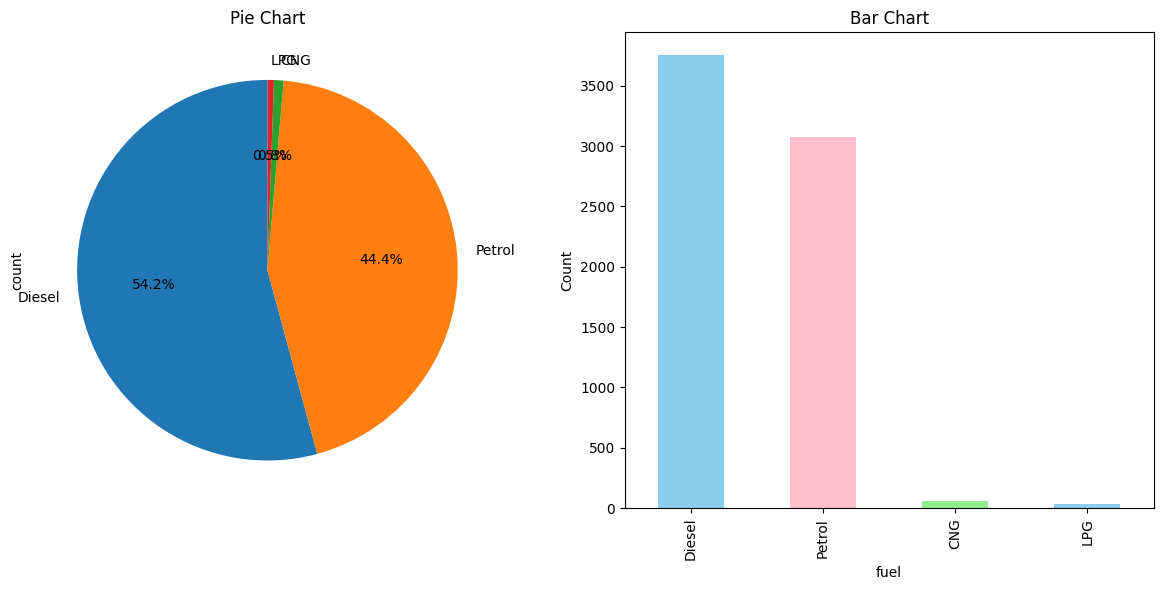

In [51]:
# Calculate fuel type counts
fuel_type_counts = df2['fuel'].value_counts()

# Create the pie chart
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
fuel_type_counts.plot.pie(autopct='%1.1f%%', ax=axs[0], startangle=90)
axs[0].set_title('Pie Chart')

# Create the bar chart
fuel_type_counts.plot.bar(ax=axs[1], color=['skyblue', 'pink', 'lightgreen'])
axs[1].set_title('Bar Chart')
axs[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

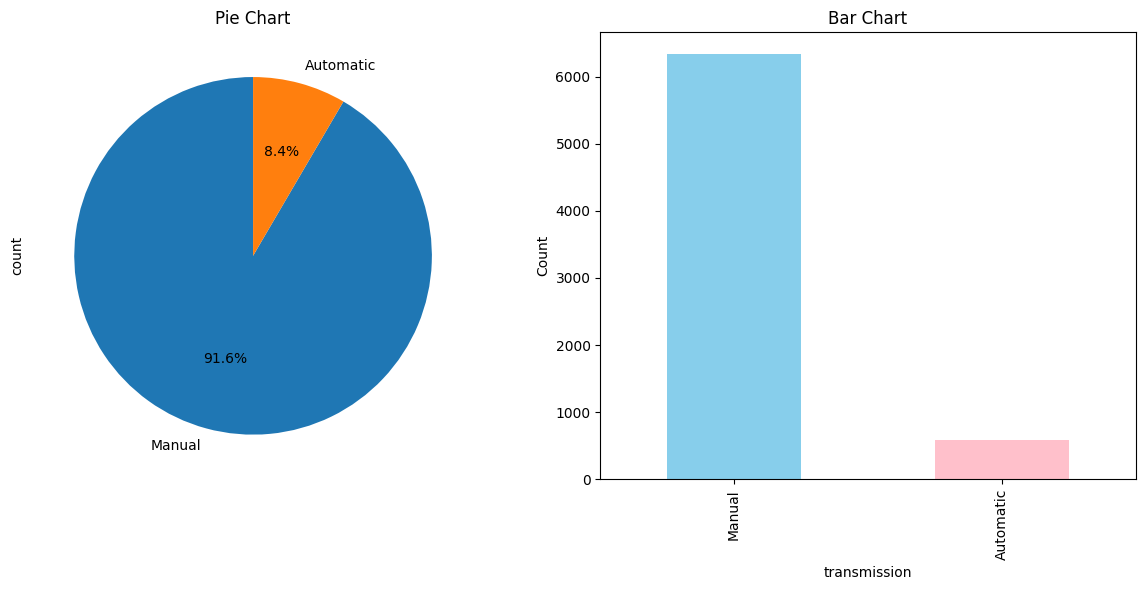

In [52]:
# Calculate transmission type counts
transmission_type_counts = df2['transmission'].value_counts()

# Create the pie chart
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
transmission_type_counts.plot.pie(autopct='%1.1f%%', ax=axs[0], startangle=90)
axs[0].set_title('Pie Chart')

# Create the bar chart
transmission_type_counts.plot.bar(ax=axs[1], color=['skyblue', 'pink'])
axs[1].set_title('Bar Chart')
axs[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

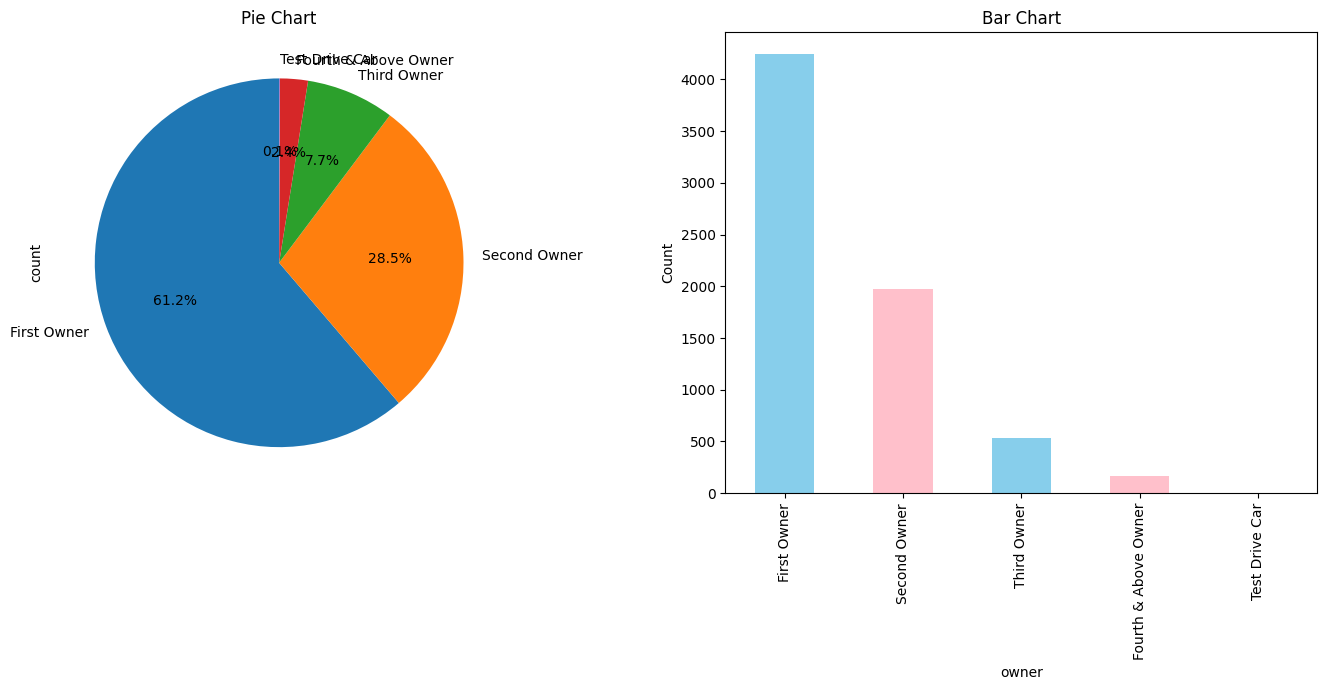

In [65]:
owner_counts = df2['owner'].value_counts()

# Create the pie chart
fig, axs = plt.subplots(1, 2, figsize=(14, 7))
owner_counts.plot.pie(autopct='%1.1f%%', ax=axs[0], startangle=90)
axs[0].set_title('Pie Chart')

# Create the bar chart
owner_counts.plot.bar(ax=axs[1], color=['skyblue', 'pink'])
axs[1].set_title('Bar Chart')
axs[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

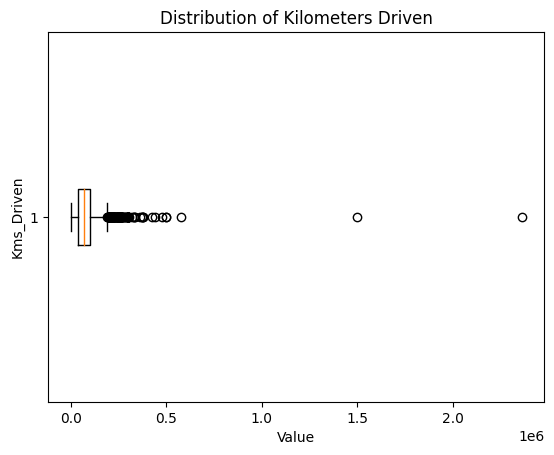

In [59]:
# Assuming 'km_driven' is a column in your DataFrame 'df2'
km_driven = df2['km_driven']

# Create the box plot
plt.boxplot(km_driven, vert=False)

# Customize the plot
plt.xlabel('Value')
plt.ylabel('Kms_Driven')
plt.title('Distribution of Kilometers Driven')

plt.show()

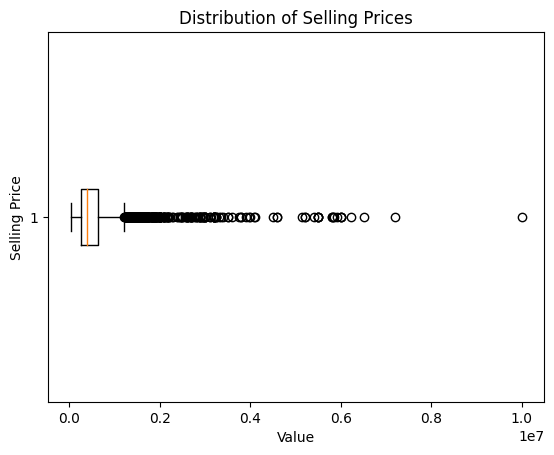

In [67]:
selling_price = df2['selling_price']
# Create the box plot
plt.boxplot(selling_price, vert=False)

# Customize the plot
plt.xlabel('Value')
plt.ylabel('Selling Price')
plt.title('Distribution of Selling Prices')

plt.show()